In [35]:
import numpy as np 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
#from functions import delays



In [39]:
novelties6 = np.loadtxt('nov_wr_PUST_Nin_6_p_5_q_2.000000_l_0.100000_seed_6.txt').astype(int)
novelties7 = np.loadtxt('nov_wr_PUST_Nin_6_p_5_q_2.000000_l_0.100000_seed_7.txt').astype(int)

In [40]:
type_6 =np.loadtxt('Type_Of_Word_Nin_6_p_5_q_2.000000_l_0.100000_seed_6.txt').astype(int)
type_7 =np.loadtxt('Type_Of_Word_Nin_6_p_5_q_2.000000_l_0.100000_seed_7.txt').astype(int)

In [36]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay

In [119]:
def decomposing_the_curve_def(type_w,novelties,time):
    dict_full_4_5 = {}
    delay,frequencies = np.unique(delays(novelties,False),return_counts=True)
    for idx,i in enumerate(delay):
        dict_full_4_5[i] ={"Frequencies": frequencies[idx], "Frequencies_4": 0.,"Frequencies_5": 0.}
    for idx2 in range(1,len(novelties)):
        delay_ = novelties[idx2]-novelties[idx2-1]-1
        if(delay_ == 0):
            pass
        else:
            lower_idx = int(novelties[idx2-1]-1)
            upper_idx = int(novelties[idx2]-1)
            dict_full_4_5[delay_]["Frequencies_4"]+= type_w[lower_idx:upper_idx].count(4)/(delay_)
            dict_full_4_5[delay_]["Frequencies_5"]+= type_w[lower_idx:upper_idx].count(5)/(delay_)    
    
    if time:
        dict_full_4_5_before = {}
        dict_full_4_5_after = {}
        for idx,i in enumerate(novelties):
            if i>time:
                sep = idx
                break
        novelties_before = novelties[:sep+1]
        delay_bef,frequencies_bef = np.unique(delays(novelties_before,False),return_counts=True)
        for idx,i in enumerate(delay_bef):
            dict_full_4_5_before[i] ={"Frequencies": frequencies_bef[idx], "Frequencies_4": 0.,"Frequencies_5": 0.}
        for idx2 in range(1,len(novelties_before)):
            delay_ = novelties_before[idx2]-novelties_before[idx2-1]-1
            if(delay_ == 0):
                pass
            else:
                lower_idx = int(novelties_before[idx2-1]-1)
                upper_idx = int(novelties_before[idx2]-1)
                dict_full_4_5_before[delay_]["Frequencies_4"]+= type_w[lower_idx:upper_idx].count(4)/(delay_)
                dict_full_4_5_before[delay_]["Frequencies_5"]+= type_w[lower_idx:upper_idx].count(5)/(delay_)
        
        novelties_after = novelties[sep:]
        delay_aft,frequencies_aft = np.unique(delays(novelties_after,False),return_counts=True)
        for idx,i in enumerate(delay_aft):
            dict_full_4_5_after[i] ={"Frequencies": frequencies_aft[idx], "Frequencies_4": 0.,"Frequencies_5": 0.}
        
        for idx2 in range(1,len(novelties_after)):
            delay_ = novelties_after[idx2]-novelties_after[idx2-1]-1
            if(delay_ == 0):
                pass
            else:
                lower_idx = int(novelties_after[idx2-1]-1)
                upper_idx = int(novelties_after[idx2]-1)
                dict_full_4_5_after[delay_]["Frequencies_4"]+= type_w[lower_idx:upper_idx].count(4)/(delay_)
                dict_full_4_5_after[delay_]["Frequencies_5"]+= type_w[lower_idx:upper_idx].count(5)/(delay_)
        
        return dict_full_4_5,dict_full_4_5_before,dict_full_4_5_after
    
    else:
        return dict_full_4_5

In [120]:
p = decomposing_the_curve_def(list(type_6),novelties6,False)

In [10]:
novelties7[15728]

300009

In [11]:
delay_6_log = delays(novelties6[:],True)
delay_7_log = delays(novelties7[:],True)

In [12]:
def binning_2(delay,n_bin):
    n,b= np.histogram(delay,n_bin)
    b_min = b[1]
    #print(b_min)
    bins = [0]
    unique = np.unique(delay,return_counts=True)
    support=((unique[0][1])/2)+0.01
    bins.append(support)
    bins.append(bins[-1]+support)

    for idx,i in enumerate(unique[0][2:-1]):
        support=(unique[0][idx+2]-unique[0][idx+1])
        if(support > b_min):
            supp2 = bins[-1]+support
            bins.append(supp2)
        else:
            bins.append(bins[-1]+b_min)
        if (bins[-1]>unique[0][-1]):
            break
    return np.array(bins)
def binning(delay):
    c= np.log(2.09)/2
    b = round(np.max(delay)/c)
    bins = np.arange(0,b)*c
    return bins

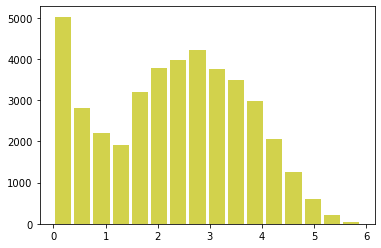

In [13]:
n6, bins_6, patches6 = plt.hist(x=delay_6_log,density=False, bins=binning(delay_6_log), color='y',alpha=0.7, rwidth=0.85)